In [16]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("Resources/alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


---
### Data cleaning and preparation process 


In [18]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [19]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [20]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [21]:
# Check for missing values
alzheimer_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [22]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [23]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2
DoctorInCharge 1


---
### Exploratory Data Analysis (EDA)



In [24]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [25]:
# Keep part of columns for abalysis
alzheimer_cleanML_df = alzheimer_df[['Ethnicity', 'Gender', 'Age', 'EducationLevel', 'Diagnosis', 'MemoryComplaints','BehavioralProblems', 'MMSE', 'FunctionalAssessment','ADL']]
alzheimer_cleanML_df

,Ethnicity,Gender,Age,EducationLevel,Diagnosis,MemoryComplaints,BehavioralProblems,MMSE,FunctionalAssessment,ADL
0,0,0,73,2,0,0,0,21.463532,6.518877,1.725883
1,0,0,89,0,0,0,0,20.613267,7.118696,2.592424
2,3,0,73,1,0,0,0,7.356249,5.895077,7.119548
3,0,1,74,1,0,0,1,13.991127,8.965106,6.481226
4,0,0,89,0,0,0,0,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...
2144,0,0,61,1,1,0,0,1.201190,0.238667,4.492838
2145,0,0,75,2,1,0,1,6.458060,8.687480,9.204952
2146,0,0,77,1,1,0,0,17.011003,1.972137,5.036334
2147,3,1,78,1,1,0,0,4.030491,5.173891,3.785399


**Age: The age of the patients ranges from 60 to 90 years.
**Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
**Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
**EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

In [26]:
# Create new columns for each ethnicity and education level
alzheimer_cleanML_df['Caucasian'] = (alzheimer_cleanML_df['Ethnicity'] == 0).astype(int)
alzheimer_cleanML_df['African American'] = (alzheimer_cleanML_df['Ethnicity'] == 1).astype(int)
alzheimer_cleanML_df['Asian'] = (alzheimer_cleanML_df['Ethnicity'] == 2).astype(int)
alzheimer_cleanML_df['Other'] = (alzheimer_cleanML_df['Ethnicity'] == 3).astype(int)

alzheimer_cleanML_df['None'] = (alzheimer_cleanML_df['EducationLevel'] == 0).astype(int)
alzheimer_cleanML_df['High School'] = (alzheimer_cleanML_df['EducationLevel'] == 1).astype(int)
alzheimer_cleanML_df['Bachelor\'s'] = (alzheimer_cleanML_df['EducationLevel'] == 2).astype(int)
alzheimer_cleanML_df['Higher'] = (alzheimer_cleanML_df['EducationLevel'] == 3).astype(int)

# Drop the original Ethnicity and EducationLevel columns
alzheimer_cleanML_df = alzheimer_cleanML_df.drop('Ethnicity', axis=1)
alzheimer_cleanML_df = alzheimer_cleanML_df.drop('EducationLevel', axis=1)

# Display the first few rows of the reshaped dataframe
alzheimer_cleanML_df

,Gender,Age,Diagnosis,MemoryComplaints,BehavioralProblems,MMSE,FunctionalAssessment,ADL,Caucasian,African American,Asian,Other,None,High School,Bachelor's,Higher
0,0,73,0,0,0,21.463532,6.518877,1.725883,1,0,0,0,0,0,1,0
1,0,89,0,0,0,20.613267,7.118696,2.592424,1,0,0,0,1,0,0,0
2,0,73,0,0,0,7.356249,5.895077,7.119548,0,0,0,1,0,1,0,0
3,1,74,0,0,1,13.991127,8.965106,6.481226,1,0,0,0,0,1,0,0
4,0,89,0,0,0,13.517609,6.045039,0.014691,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,61,1,0,0,1.201190,0.238667,4.492838,1,0,0,0,0,1,0,0
2145,0,75,1,0,1,6.458060,8.687480,9.204952,1,0,0,0,0,0,1,0
2146,0,77,1,0,0,17.011003,1.972137,5.036334,1,0,0,0,0,1,0,0
2147,1,78,1,0,0,4.030491,5.173891,3.785399,0,0,0,1,0,1,0,0


In [27]:
# Prepare the data:
X = alzheimer_cleanML_df.drop('Diagnosis', axis=1)  
y = alzheimer_cleanML_df['Diagnosis']

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Review number of features
print(len(X_train_scaled[0]))

15


In [43]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5973 - loss: 0.6546 - val_accuracy: 0.7849 - val_loss: 0.4869
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3901 - val_accuracy: 0.8285 - val_loss: 0.4053
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3425 - val_accuracy: 0.8256 - val_loss: 0.4020
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3119 - val_accuracy: 0.8372 - val_loss: 0.3736
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.3088 - val_accuracy: 0.8488 - val_loss: 0.3687
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.2715 - val_accuracy: 0.8547 - val_loss: 0.3593
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2611 - val_accuracy: 0.8459 - val_loss: 0.3542
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9117 - loss: 0.2451 - val_accuracy: 0.8605 - v

In [41]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8811 - loss: 0.9832
Test accuracy: 0.8720930218696594


In [32]:
# Define the model - deep neural net
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32
hidden_nodes_layer4 = 16

kernel_regularizer=regularizers.l2(0.01)

nn = tf.keras.models.Sequential()

In [35]:
# First hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer1, activation="relu"), input_shape=(X_train.shape[1])),

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"), kernel_regularizer),

# Third hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, activation="relu"), kernel_regularizer),

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, activation="relu"), kernel_regularizer),

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"), kernel_regularizer)

# Check the structure of the model
nn.summary()

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'

In [ ]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=58, validation_split=0.2, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5604 - loss: 0.6750 - val_accuracy: 0.7326 - val_loss: 0.5351
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4505 - val_accuracy: 0.8023 - val_loss: 0.4190
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3480 - val_accuracy: 0.8023 - val_loss: 0.4282
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3250 - val_accuracy: 0.8314 - val_loss: 0.3930
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3265 - val_accuracy: 0.8372 - val_loss: 0.3811
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.2817 - val_accuracy: 0.8023 - val_loss: 0.3978
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8881 - loss: 0.2853 - val_accuracy: 0.8169 - val_loss: 0.3899
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9132 - loss: 0.2434 - val_accuracy: 0.8517 - v

In [ ]:
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

14/14 - 0s - 2ms/step - accuracy: 0.8814 - loss: 0.9931
Loss: 0.9930531978607178, Accuracy: 0.8813953399658203


In [ ]:
filename = 'alzheimer_ML.h5'
nn.save(filename)

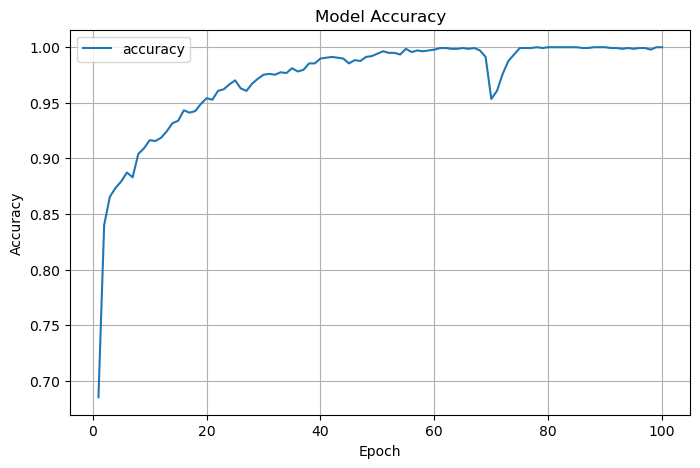

In [ ]:
# Plot accuracy of the model
plot_df = pd.DataFrame(fit_model.history, index =  range(1, len(fit_model.history["loss"]) + 1))
plot_df.plot(y = "accuracy", figsize = (8, 5))
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("model_accuracy_opt.png")
plt.show()